### Adding a filter to this image 
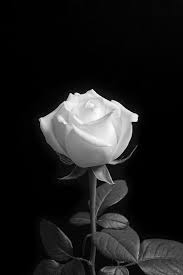

###  By using the filter present in this image
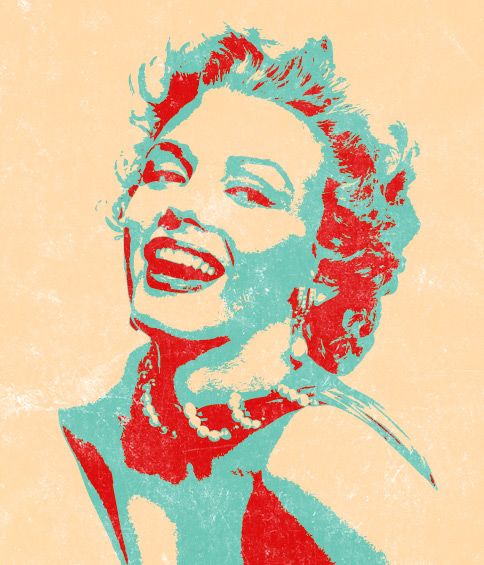

# Imageio 
 Imageio is a Python library that provides an easy interface to read and write a wide range of image and video data, including animated images, volumetric data, and scientific formats.

In [1]:
import imageio.v2 as iio
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# To read an image
img = iio.imread(r"C:\Users\admin\Desktop\AI ML\Image filtering\pic4.jpeg")

In [3]:
# Provides array of RGB Values
# For example: RGB(93,  74,  68) is brown

img

Array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 9,  9,  9],
        [ 9,  9,  9],
        [10, 10, 10]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 9,  9,  9],
        [ 9,  9,  9],
        [10, 10, 10]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 9,  9,  9],
        [ 9,  9,  9],
        [ 9,  9,  9]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [86, 86, 86],
        [91, 91, 91],
        [80, 80, 80]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [75, 75, 75],
        [87, 87, 87],
        [81, 81, 81]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [68, 68, 68],
        [84, 84, 84],
        [81, 81, 81]]], dtype=uint8)

In [4]:
# 3D shape where it has 275 rows and 183 columns, each of the pixels has 3 values associated with it 
img.shape

(275, 183, 3)

In [5]:
# The flatten() method will convert the image img into a 1D array. 
# The reshape() method will then reshape the 1D array into a 3D array with the specified shape.
# Useful for preprocessing images before feeding them into a ML model.

x = img.flatten().reshape(275*183,3)
x

Array([[ 0,  0,  0],
       [ 0,  0,  0],
       [ 0,  0,  0],
       ...,
       [68, 68, 68],
       [84, 84, 84],
       [81, 81, 81]], dtype=uint8)

In [6]:
# KMeans is a machine learning algorithm that can automatically group data points into clusters. 
# The number of clusters is called n_clusters in this case, KMeans to create 3 clusters
# The fit() method tells KMeans to start clustering the data. Once it's finished, KMeans will have created 3 clusters, and each data point will be assigned to one of the clusters.
# KMeans is going to look at the data points in the array x and try to group them into 3 clusters

kmeans = KMeans(n_clusters = 3,
                random_state = 0).fit(x,)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
# The labels_ attribute of a KMeans model is an array of integers that tells you which cluster each data point belongs to. 

kmeans.labels_


array([0, 0, 0, ..., 2, 2, 2])

In [8]:
# colors array contains three RGB color values, one for each cluster. 

# Filter to use

# rgb(255,217,171) -> peach
# rgb(124,199,190) -> light blue
# rgb(219,23,22)   -> red

colors = [[255,217,171],[124,199,190], [219,23,22]]

In [9]:
# new_img will be a 3D array with the same shape as the original image. 
# The first dimension of the array will contain the pixel values, and the second and third dimensions will contain the RGB channels.

new_img = [colors[i] for i in kmeans.labels_]
new_image = np.reshape(new_img, img.shape)

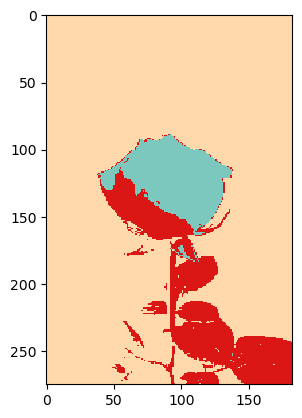

In [10]:
# Plotting the image using imshow()
# Interpolation argument specifies the interpolation method to be used when colouring the image. 
# The nearest interpolation method will use the nearest pixel value when colouring the image

plt.imshow(new_image, interpolation = "nearest")
plt.savefig("edited.jpg")
plt.show()


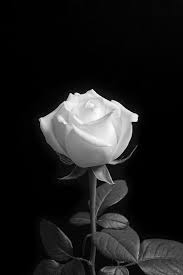